In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import torch
from tqdm.notebook import tqdm

In [ ]:
df=pd.read_csv("/content/drive/My Drive/test.csv")
df[:4]

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1


In [ ]:
dict_label = {
    'sadness': 0,
    'joy': 1,
    'love': 2,
    'anger': 3,
    'fear': 4,
    'trust': 5
}
dicti = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'trust'
}

In [ ]:
x = []
y = []
for i in range(len(df['text'])):
  x.append(i)
  y.append(dicti[df['label'][i]])

In [ ]:
df['Id'] = x;
df['category'] = y
df.set_index('Id',inplace = True)
df[:4]
#a classification label, with possible values including sadness (0), joy (1), love (2), anger (3), fear (4), trust(5).

,text,label,category
Id,,,
0,im feeling rather rotten so im not very ambiti...,0,sadness
1,im updating my blog because i feel shitty,0,sadness
2,i never make her separate from me because i do...,0,sadness
3,i left with my bouquet of red and yellow tulip...,1,joy


In [ ]:
df.label.value_counts()

label
1    695
0    581
3    275
4    224
2    159
5     66
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

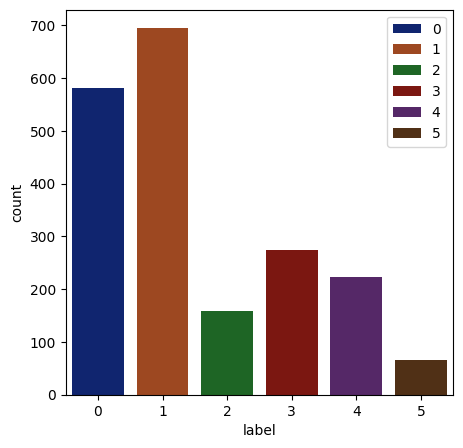

In [ ]:
plt.rcParams['figure.figsize'] = (5,5)
sns.countplot(x = df["label"],hue = df["label"],palette = 'dark')
plt.legend(loc = 'upper right')
plt.show()

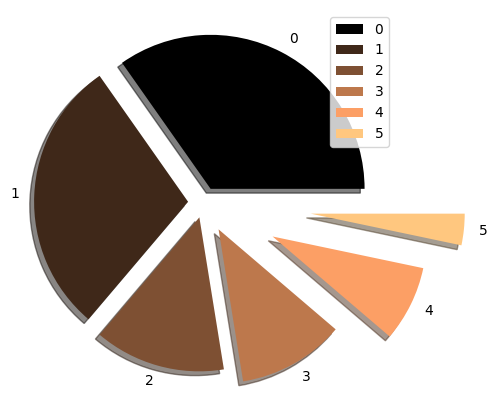

In [ ]:
labels = [0,1,2,3,4,5]
sizes = df["label"].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 6))
explode = [0.1, 0.1,0.1, 0.2, 0.5, 0.7]
cmap = plt.get_cmap('Spectral')
plt.pie(sizes,labels = labels,colors = colors,shadow = True,explode = explode)
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.index.values,
                                                df.label.values,
                                                test_size = 0.15,
                                                random_state=17,
                                                stratify = df.label.values)

In [ ]:
df.loc[X_train,'data_type'] = 'train'
df.loc[X_test,'data_type'] = 'test'

In [ ]:
df.groupby(['category','label','data_type']).count()

text
category label data_type      
anger    3     test         41
               train       234
fear     4     test         34
               train       190
joy      1     test        104
               train       591
love     2     test         24
               train       135
sadness  0     test         87
               train       494
trust    5     test         10
               train        56

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case = True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
encoder_train = tokenizer.batch_encode_plus(df[df["data_type"]=='train'].text.values,
                                           add_special_tokens = True,
                                            return_attention_masks = True,
                                           pad_to_max_length = True,
                                           max_length = 256,
                                           return_tensors = 'pt')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_atten

In [ ]:
encoder_test = tokenizer.batch_encode_plus(df[df["data_type"]=='test'].text.values,
                                           add_special_tokens = True,
                                            return_attention_masks = True,
                                           pad_to_max_length = True,
                                           max_length = 256,
                                           return_tensors = 'pt')

Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recogni

In [ ]:
input_ids_train = encoder_train['input_ids']
attention_masks_train = encoder_train["attention_mask"]
labels_train = torch.tensor(df[df['data_type']=='train'].label.values)

In [ ]:
input_ids_test = encoder_test['input_ids']
attention_masks_test = encoder_test["attention_mask"]
labels_test = torch.tensor(df[df['data_type']=='test'].label.values)

In [ ]:
data_train = TensorDataset(input_ids_train,attention_masks_train,labels_train)
data_test = TensorDataset(input_ids_test,attention_masks_test,labels_test)

In [ ]:
len(data_train),len(data_test)

(1700, 300)

In [ ]:
from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                     num_labels = 6,
                                     output_attentions = False,
                                     output_hidden_states =  False)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch.utils.data import RandomSampler,SequentialSampler,DataLoader

In [ ]:
dataloader_train = DataLoader(
    data_train,
    sampler= RandomSampler(data_train),
    batch_size = 16
)

In [ ]:
dataloader_test = DataLoader(
    data_test,
    sampler= RandomSampler(data_test),
    batch_size = 32
)

In [ ]:
from transformers import AdamW,get_linear_schedule_with_warmup
optimizer = AdamW(model.parameters(),lr = 1e-5,eps = 1e-8)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
epochs = 4
scheduler = get_linear_schedule_with_warmup(
            optimizer,
    num_warmup_steps = 0,
   num_training_steps = len(dataloader_train)*epochs
)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
def f1_score_func(preds,labels):
    preds_flat = np.argmax(preds,axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat,preds_flat,average = 'weighted')

In [ ]:
def accuracy_per_class(preds,labels):
    label_dict_reverse = dicti
    preds_flat = np.argmax(preds,axis=1).flatten()
    labels_flat = labels.flatten()
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f"Class:{label_dict_reverse}")
        print(f"Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n")

In [ ]:
import random
seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
def evaluate(dataloader_val):
    model.eval()
    loss_val_total = 0
    predictions,true_vals = [],[]
    for batch in tqdm(dataloader_val):
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids':  batch[0],
                  'attention_mask':batch[1],
                  'labels': batch[2]
                 }
        with torch.no_grad():
            outputs = model(**inputs)
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total +=loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    loss_val_avg = loss_val_total/len(dataloader_val)
    predictions = np.concatenate(predictions,axis=0)
    true_vals = np.concatenate(true_vals,axis=0)
    return loss_val_avg,predictions,true_vals

In [ ]:
epoch = 1
model.train()
loss_train_total=0
progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
for batch in progress_bar:
    model.zero_grad()
    batch = tuple(b.to(device) for b in batch)
    inputs = {
      "input_ids":batch[0],
      "attention_mask":batch[1],
      "labels":batch[2]
    }
    outputs = model(**inputs)
    loss = outputs[0]
    loss_train_total +=loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
    optimizer.step()
    scheduler.step()
    progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
tqdm.write('\nEpoch {epoch}')
loss_train_avg = loss_train_total/len(dataloader_train)
tqdm.write(f'Training Loss: {loss_train_avg}')
val_loss,predictions,true_vals = evaluate(dataloader_test)
test_score = f1_score_func(predictions,true_vals)
tqdm.write(f'Val Loss:{val_loss}\n Test Score:{test_score}')

Epoch: 1:   0%|          | 0/107 [00:00<?, ?it/s]

<ipython-input-32-3feb362c1ad6>:17: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch {epoch}
Training Loss: 1.615073561668396


  0%|          | 0/10 [00:00<?, ?it/s]

Val Loss:1.425156056880951
 Test Score:0.3823528528528528


In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/BERT_ft_epoch1.model')

In [ ]:
accuracy_per_class(predictions,true_vals)

Class:{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'trust'}
Accuracy:79/87

Class:{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'trust'}
Accuracy:65/104

Class:{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'trust'}
Accuracy:0/24

Class:{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'trust'}
Accuracy:0/41

Class:{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'trust'}
Accuracy:0/34

Class:{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'trust'}
Accuracy:0/10



In [ ]:
epoch = 2
model.train()
loss_train_total=0
progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
for batch in progress_bar:
    model.zero_grad()
    batch = tuple(b.to(device) for b in batch)
    inputs = {
      "input_ids":batch[0],
      "attention_mask":batch[1],
      "labels":batch[2]
    }
    outputs = model(**inputs)
    loss = outputs[0]
    loss_train_total +=loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
    optimizer.step()
    scheduler.step()
    progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
tqdm.write(f'\nEpoch {epoch}')
loss_train_avg = loss_train_total/len(dataloader_train)
tqdm.write(f'Training Loss: {loss_train_avg}')
val_loss,predictions,true_vals = evaluate(dataloader_test)
test_score = f1_score_func(predictions,true_vals)
tqdm.write(f'Val Loss:{val_loss}\n Test Score:{test_score}')

Epoch: 2:   0%|          | 0/107 [00:00<?, ?it/s]

<ipython-input-34-acb2924ece3b>:17: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch 2
Training Loss: 1.2387979933034594


  0%|          | 0/10 [00:00<?, ?it/s]

Val Loss:1.1461524486541748
 Test Score:0.4571425726141079


In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/BERT_ft_epoch2.pth')

In [ ]:
model.load_state_dict(torch.load('/content/drive/My Drive/BERT_ft_epoch13.pth'))

<All keys matched successfully>

In [ ]:
epoch = 3
model.train()
loss_train_total=0
progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
for batch in progress_bar:
    model.zero_grad()
    batch = tuple(b.to(device) for b in batch)
    inputs = {
      "input_ids":batch[0],
      "attention_mask":batch[1],
      "labels":batch[2]
    }
    outputs = model(**inputs)
    loss = outputs[0]
    loss_train_total += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
    optimizer.step()
    scheduler.step()
    progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
tqdm.write(f'\nEpoch {epoch}')
loss_train_avg = loss_train_total/len(dataloader_train)
tqdm.write(f'Training Loss: {loss_train_avg}')
val_loss,predictions,true_vals = evaluate(dataloader_test)
test_score = f1_score_func(predictions,true_vals)
tqdm.write(f'Val Loss:{val_loss}\n Test Score:{test_score}')

Epoch: 3:   0%|          | 0/107 [00:00<?, ?it/s]

<ipython-input-36-e78859011b60>:17: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch 3
Training Loss: 1.0188588839825068


  0%|          | 0/10 [00:00<?, ?it/s]

Val Loss:1.0905343532562255
 Test Score:0.50187732528909


In [ ]:
epoch = 4
model.train()
loss_train_total=0
progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
for batch in progress_bar:
    model.zero_grad()
    batch = tuple(b.to(device) for b in batch)
    inputs = {
      "input_ids":batch[0],
      "attention_mask":batch[1],
      "labels":batch[2]
    }
    outputs = model(**inputs)
    loss = outputs[0]
    loss_train_total += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
    optimizer.step()
    scheduler.step()
    progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
tqdm.write(f'\nEpoch {epoch}')
loss_train_avg = loss_train_total/len(dataloader_train)
tqdm.write(f'Training Loss: {loss_train_avg}')
val_loss,predictions,true_vals = evaluate(dataloader_test)
test_score = f1_score_func(predictions,true_vals)
tqdm.write(f'Val Loss:{val_loss}\n Test Score:{test_score}')

Epoch: 4:   0%|          | 0/107 [00:00<?, ?it/s]

<ipython-input-37-93bab945e50c>:17: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch 4
Training Loss: 0.9243755964475258


  0%|          | 0/10 [00:00<?, ?it/s]

Val Loss:1.0276183545589448
 Test Score:0.5607102416889651


In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/BERT_ft_epoch4.pth')

In [ ]:
epoch = 5
model.train()
loss_train_total=0
progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
for batch in progress_bar:
    model.zero_grad()
    batch = tuple(b.to(device) for b in batch)
    inputs = {
      "input_ids":batch[0],
      "attention_mask":batch[1],
      "labels":batch[2]
    }
    outputs = model(**inputs)
    loss = outputs[0]
    loss_train_total += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
    optimizer.step()
    scheduler.step()
    progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
tqdm.write(f'\nEpoch {epoch}')
loss_train_avg = loss_train_total/len(dataloader_train)
tqdm.write(f'Training Loss: {loss_train_avg}')
val_loss,predictions,true_vals = evaluate(dataloader_test)
test_score = f1_score_func(predictions,true_vals)
tqdm.write(f'Val Loss:{val_loss}\n Test Score:{test_score}')

In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/BERT_ft_epoch5.pth')

In [ ]:
model.load_state_dict(torch.load('/content/drive/My Drive/BERT_ft_epoch5.pth'))

<All keys matched successfully>

In [ ]:
epoch = 6
model.train()
loss_train_total=0
progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
for batch in progress_bar:
    model.zero_grad()
    batch = tuple(b.to(device) for b in batch)
    inputs = {
      "input_ids":batch[0],
      "attention_mask":batch[1],
      "labels":batch[2]
    }
    outputs = model(**inputs)
    loss = outputs[0]
    loss_train_total += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
    optimizer.step()
    scheduler.step()
    progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
tqdm.write(f'\nEpoch {epoch}')
loss_train_avg = loss_train_total/len(dataloader_train)
tqdm.write(f'Training Loss: {loss_train_avg}')
val_loss,predictions,true_vals = evaluate(dataloader_test)
test_score = f1_score_func(predictions,true_vals)
tqdm.write(f'Val Loss:{val_loss}\n Test Score:{test_score}')

Epoch: 6:   0%|          | 0/107 [00:00<?, ?it/s]

<ipython-input-37-f09b1b9f2f62>:17: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch 6
Training Loss: 0.7951808802992384


  0%|          | 0/10 [00:00<?, ?it/s]

Val Loss:0.7983412504196167
 Test Score:0.7081153734231964


In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/BERT_ft_epoch6.pth')

In [ ]:
epoch = 7
model.train()
loss_train_total=0
progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
for batch in progress_bar:
    model.zero_grad()
    batch = tuple(b.to(device) for b in batch)
    inputs = {
      "input_ids":batch[0],
      "attention_mask":batch[1],
      "labels":batch[2]
    }
    outputs = model(**inputs)
    loss = outputs[0]
    loss_train_total += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
    optimizer.step()
    scheduler.step()
    progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
tqdm.write(f'\nEpoch {epoch}')
loss_train_avg = loss_train_total/len(dataloader_train)
tqdm.write(f'Training Loss: {loss_train_avg}')
val_loss,predictions,true_vals = evaluate(dataloader_test)
test_score = f1_score_func(predictions,true_vals)
tqdm.write(f'Val Loss:{val_loss}\n Test Score:{test_score}')

Epoch: 7:   0%|          | 0/107 [00:00<?, ?it/s]

<ipython-input-39-00a0933200ff>:17: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch 7
Training Loss: 0.5224667658037114


  0%|          | 0/10 [00:00<?, ?it/s]

Val Loss:0.6650516629219055
 Test Score:0.7540123742552126


In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/BERT_ft_epoch7.pth')

In [ ]:
epoch = 8
model.train()
loss_train_total=0
progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
for batch in progress_bar:
    model.zero_grad()
    batch = tuple(b.to(device) for b in batch)
    inputs = {
      "input_ids":batch[0],
      "attention_mask":batch[1],
      "labels":batch[2]
    }
    outputs = model(**inputs)
    loss = outputs[0]
    loss_train_total += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
    optimizer.step()
    scheduler.step()
    progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
tqdm.write(f'\nEpoch {epoch}')
loss_train_avg = loss_train_total/len(dataloader_train)
tqdm.write(f'Training Loss: {loss_train_avg}')
val_loss,predictions,true_vals = evaluate(dataloader_test)
test_score = f1_score_func(predictions,true_vals)
tqdm.write(f'Val Loss:{val_loss}\n Test Score:{test_score}')

Epoch: 8:   0%|          | 0/107 [00:00<?, ?it/s]

<ipython-input-41-38197fc92af2>:17: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch 8
Training Loss: 0.371240084137872


  0%|          | 0/10 [00:00<?, ?it/s]

Val Loss:0.5988599807024002
 Test Score:0.7770089195895648


In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/BERT_ft_epoch8.pth')

In [ ]:
epoch = 9
model.train()
loss_train_total=0
progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
for batch in progress_bar:
    model.zero_grad()
    batch = tuple(b.to(device) for b in batch)
    inputs = {
      "input_ids":batch[0],
      "attention_mask":batch[1],
      "labels":batch[2]
    }
    outputs = model(**inputs)
    loss = outputs[0]
    loss_train_total += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
    optimizer.step()
    scheduler.step()
    progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
tqdm.write(f'\nEpoch {epoch}')
loss_train_avg = loss_train_total/len(dataloader_train)
tqdm.write(f'Training Loss: {loss_train_avg}')
val_loss,predictions,true_vals = evaluate(dataloader_test)
test_score = f1_score_func(predictions,true_vals)
tqdm.write(f'Val Loss:{val_loss}\n Test Score:{test_score}')

Epoch: 9:   0%|          | 0/107 [00:00<?, ?it/s]

<ipython-input-44-b9b2070f2a1a>:17: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch 9
Training Loss: 0.29810642458011055

Epoch 9
Training Loss: 0.29810642458011055


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Val Loss:0.6085724338889122
 Test Score:0.7656497704290266
Val Loss:0.6085724338889122
 Test Score:0.7656497704290266


In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/BERT_ft_epoch9.pth')

In [ ]:
epoch = 10
model.train()
loss_train_total=0
progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
for batch in progress_bar:
    model.zero_grad()
    batch = tuple(b.to(device) for b in batch)
    inputs = {
      "input_ids":batch[0],
      "attention_mask":batch[1],
      "labels":batch[2]
    }
    outputs = model(**inputs)
    loss = outputs[0]
    loss_train_total += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
    optimizer.step()
    scheduler.step()
    progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
tqdm.write(f'\nEpoch {epoch}')
loss_train_avg = loss_train_total/len(dataloader_train)
tqdm.write(f'Training Loss: {loss_train_avg}')
val_loss,predictions,true_vals = evaluate(dataloader_test)
test_score = f1_score_func(predictions,true_vals)
tqdm.write(f'Val Loss:{val_loss}\n Test Score:{test_score}')

Epoch: 10:   0%|          | 0/107 [00:00<?, ?it/s]

<ipython-input-31-4870e3431d40>:17: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch 10
Training Loss: 0.21771267073873046


  0%|          | 0/10 [00:00<?, ?it/s]

Val Loss:0.5177272707223892
 Test Score:0.8202792115588605


In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/BERT_ft_epoch10.pth')

In [ ]:
epoch = 11
model.train()
loss_train_total=0
progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
for batch in progress_bar:
    model.zero_grad()
    batch = tuple(b.to(device) for b in batch)
    inputs = {
      "input_ids":batch[0],
      "attention_mask":batch[1],
      "labels":batch[2]
    }
    outputs = model(**inputs)
    loss = outputs[0]
    loss_train_total += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
    optimizer.step()
    scheduler.step()
    progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
tqdm.write(f'\nEpoch {epoch}')
loss_train_avg = loss_train_total/len(dataloader_train)
tqdm.write(f'Training Loss: {loss_train_avg}')
val_loss,predictions,true_vals = evaluate(dataloader_test)
test_score = f1_score_func(predictions,true_vals)
tqdm.write(f'Val Loss:{val_loss}\n Test Score:{test_score}')

Epoch: 11:   0%|          | 0/107 [00:00<?, ?it/s]

<ipython-input-33-a89c7ed93f10>:17: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch 11
Training Loss: 0.11687331227150476


  0%|          | 0/10 [00:00<?, ?it/s]

Val Loss:0.5345987811684608
 Test Score:0.832037258722547


In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/BERT_ft_epoch11.pth')

In [ ]:
epoch = 12
model.train()
loss_train_total=0
progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
for batch in progress_bar:
    model.zero_grad()
    batch = tuple(b.to(device) for b in batch)
    inputs = {
      "input_ids":batch[0],
      "attention_mask":batch[1],
      "labels":batch[2]
    }
    outputs = model(**inputs)
    loss = outputs[0]
    loss_train_total += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
    optimizer.step()
    scheduler.step()
    progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
tqdm.write(f'\nEpoch {epoch}')
loss_train_avg = loss_train_total/len(dataloader_train)
tqdm.write(f'Training Loss: {loss_train_avg}')
val_loss,predictions,true_vals = evaluate(dataloader_test)
test_score = f1_score_func(predictions,true_vals)
tqdm.write(f'Val Loss:{val_loss}\n Test Score:{test_score}')

Epoch: 12:   0%|          | 0/107 [00:00<?, ?it/s]

<ipython-input-35-f6998e59adbb>:17: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch 12
Training Loss: 0.0767791762634694


  0%|          | 0/10 [00:00<?, ?it/s]

Val Loss:0.5188936583697796
 Test Score:0.835348596192341


In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/BERT_ft_epoch12.pth')

In [ ]:
epoch = 13
model.train()
loss_train_total=0
progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
for batch in progress_bar:
    model.zero_grad()
    batch = tuple(b.to(device) for b in batch)
    inputs = {
      "input_ids":batch[0],
      "attention_mask":batch[1],
      "labels":batch[2]
    }
    outputs = model(**inputs)
    loss = outputs[0]
    loss_train_total += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
    optimizer.step()
    scheduler.step()
    progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
tqdm.write(f'\nEpoch {epoch}')
loss_train_avg = loss_train_total/len(dataloader_train)
tqdm.write(f'Training Loss: {loss_train_avg}')
val_loss,predictions,true_vals = evaluate(dataloader_test)
test_score = f1_score_func(predictions,true_vals)
tqdm.write(f'Val Loss:{val_loss}\n Test Score:{test_score}')

Epoch: 13:   0%|          | 0/107 [00:00<?, ?it/s]

<ipython-input-37-2119cbe1a0af>:17: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch 13
Training Loss: 0.06070825087655092


  0%|          | 0/10 [00:00<?, ?it/s]

Val Loss:0.5703760549426079
 Test Score:0.8358553686120678


In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/BERT_ft_epoch13.pth')

In [ ]:
epoch = 14
model.train()
loss_train_total=0
progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
for batch in progress_bar:
    model.zero_grad()
    batch = tuple(b.to(device) for b in batch)
    inputs = {
      "input_ids":batch[0],
      "attention_mask":batch[1],
      "labels":batch[2]
    }
    outputs = model(**inputs)
    loss = outputs[0]
    loss_train_total += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
    optimizer.step()
    scheduler.step()
    progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
tqdm.write(f'\nEpoch {epoch}')
loss_train_avg = loss_train_total/len(dataloader_train)
tqdm.write(f'Training Loss: {loss_train_avg}')
val_loss,predictions,true_vals = evaluate(dataloader_test)
test_score = f1_score_func(predictions,true_vals)
tqdm.write(f'Val Loss:{val_loss}\n Test Score:{test_score}')

Epoch: 14:   0%|          | 0/107 [00:00<?, ?it/s]

<ipython-input-29-8b0ce4c705f3>:17: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch 14
Training Loss: 0.035067213929876266


  0%|          | 0/10 [00:00<?, ?it/s]

Val Loss:0.5746007800102234
 Test Score:0.8506875845472912


In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/BERT_ft_epoch14.pth')

In [ ]:
epoch = 15
model.train()
loss_train_total=0
progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
for batch in progress_bar:
    model.zero_grad()
    batch = tuple(b.to(device) for b in batch)
    inputs = {
      "input_ids":batch[0],
      "attention_mask":batch[1],
      "labels":batch[2]
    }
    outputs = model(**inputs)
    loss = outputs[0]
    loss_train_total += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
    optimizer.step()
    scheduler.step()
    progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
tqdm.write(f'\nEpoch {epoch}')
loss_train_avg = loss_train_total/len(dataloader_train)
tqdm.write(f'Training Loss: {loss_train_avg}')
val_loss,predictions,true_vals = evaluate(dataloader_test)
test_score = f1_score_func(predictions,true_vals)
tqdm.write(f'Val Loss:{val_loss}\n Test Score:{test_score}')

Epoch: 15:   0%|          | 0/107 [00:00<?, ?it/s]

<ipython-input-31-0aa56d86668a>:17: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch 15
Training Loss: 0.019149278971653815


  0%|          | 0/10 [00:00<?, ?it/s]

Val Loss:0.6187903143465519
 Test Score:0.8455017336533924


In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/BERT_ft_epoch15.pth')

In [ ]:
epoch = 16
model.train()
loss_train_total=0
progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
for batch in progress_bar:
    model.zero_grad()
    batch = tuple(b.to(device) for b in batch)
    inputs = {
      "input_ids":batch[0],
      "attention_mask":batch[1],
      "labels":batch[2]
    }
    outputs = model(**inputs)
    loss = outputs[0]
    loss_train_total += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
    optimizer.step()
    scheduler.step()
    progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
tqdm.write(f'\nEpoch {epoch}')
loss_train_avg = loss_train_total/len(dataloader_train)
tqdm.write(f'Training Loss: {loss_train_avg}')
val_loss,predictions,true_vals = evaluate(dataloader_test)
test_score = f1_score_func(predictions,true_vals)
tqdm.write(f'Val Loss:{val_loss}\n Test Score:{test_score}')

Epoch: 16:   0%|          | 0/107 [00:00<?, ?it/s]

<ipython-input-33-716a3d7d294c>:17: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch 16
Training Loss: 0.010954656851451808


  0%|          | 0/10 [00:00<?, ?it/s]

Val Loss:0.5842806589789689
 Test Score:0.8506057265425773


In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/BERT_ft_epoch16.pth')

In [ ]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
_,predictions,true_vals = evaluate(dataloader_test)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
x = 0
for i in range(len(predictions)):
  print(_, predictions[i].argmax(), true_vals[i])
  if(predictions[i].argmax() == true_vals[i]):
    x += 1

0.6191132426261902 0 0
0.6191132426261902 3 3
0.6191132426261902 1 1
0.6191132426261902 2 1
0.6191132426261902 0 0
0.6191132426261902 0 0
0.6191132426261902 3 3
0.6191132426261902 2 2
0.6191132426261902 1 1
0.6191132426261902 0 0
0.6191132426261902 0 0
0.6191132426261902 1 1
0.6191132426261902 1 1
0.6191132426261902 4 4
0.6191132426261902 3 3
0.6191132426261902 1 1
0.6191132426261902 0 0
0.6191132426261902 0 0
0.6191132426261902 0 1
0.6191132426261902 1 5
0.6191132426261902 1 1
0.6191132426261902 0 0
0.6191132426261902 3 3
0.6191132426261902 4 4
0.6191132426261902 1 1
0.6191132426261902 4 4
0.6191132426261902 1 1
0.6191132426261902 1 1
0.6191132426261902 0 3
0.6191132426261902 0 3
0.6191132426261902 3 3
0.6191132426261902 1 1
0.6191132426261902 1 1
0.6191132426261902 3 3
0.6191132426261902 3 3
0.6191132426261902 4 4
0.6191132426261902 2 2
0.6191132426261902 1 1
0.6191132426261902 1 3
0.6191132426261902 1 1
0.6191132426261902 4 4
0.6191132426261902 1 1
0.6191132426261902 1 1
0.619113242

In [ ]:
accuracy_per_class(predictions,true_vals)

Class:{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'trust'}
Accuracy:79/87

Class:{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'trust'}
Accuracy:95/104

Class:{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'trust'}
Accuracy:15/24

Class:{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'trust'}
Accuracy:34/41

Class:{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'trust'}
Accuracy:28/34

Class:{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'trust'}
Accuracy:5/10

